<a href="https://colab.research.google.com/github/BlackUBird/TMCIT_T5DSP/blob/main/T5_DSP_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

author: 上原正志  
date: 2022.10.17  
- ケプストラム分析

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read
from numpy.fft import fft, ifft, fftfreq
from IPython.display import Audio

## 音声の読み込み

16000


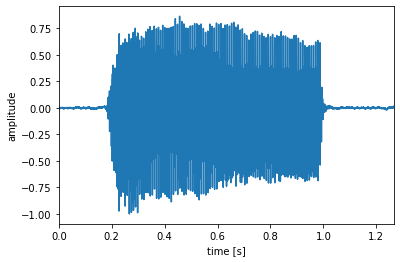

In [47]:
fs, a = read("speech_a.wav")
print(fs)
t = np.arange(0, len(a))/fs
a = a/max(np.abs(a))
plt.xlim(0, len(a)/fs)
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.plot(t,a)
Audio(a, rate=fs)

In [48]:
len(a)

20248

## 解析区間の抽出

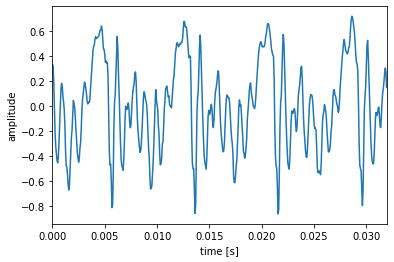

In [49]:
start_sec = 0.3
N = 512

start_sample = int(start_sec * fs)
end_sample = start_sample+N

x = a[start_sample:end_sample]
t_target = np.arange(0, N)/fs
plt.xlim(0, N/fs)
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.plot(t_target,x)

## スペクトルの導出
離散フーリエ変換(fft)をおこなう

In [50]:
X = fft(x)

スペクトルの可視化（上段：実数部，下段：虚数部）

Text(0.5, 0, 'frequency [Hz]')

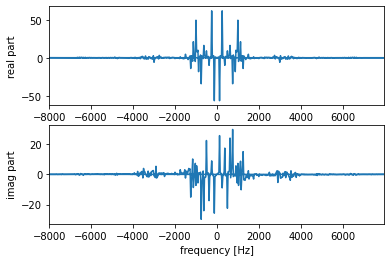

In [51]:
freqs = fftfreq(N, d=1.0/fs)

plt.subplot(2,1,1)
plt.plot(freqs, X.real)
plt.xlim(min(freqs), max(freqs))
plt.ylabel("real part")

plt.subplot(2,1,2)
plt.plot(freqs, X.imag)
plt.xlim(min(freqs), max(freqs))
plt.ylabel("imag part")

plt.xlabel("frequency [Hz]")

## 振幅スペクトル
複素スペクトルの絶対値

In [52]:
X_abs = np.abs(X)       #大きさについて
X_angle = np.angle(X)  #位相について

複素スペクトルの可視化

(-8000.0, 7968.75)

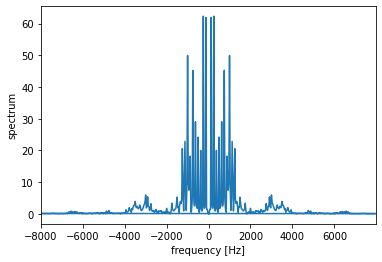

In [53]:
freqs = fftfreq(N, d=1.0/fs)

plt.plot(freqs, X_abs)
plt.xlabel("frequency [Hz]")
plt.ylabel("spectrum")
plt.xlim(min(freqs), max(freqs))

負の周波数成分を除いて可視化

(0.0, 7968.75)

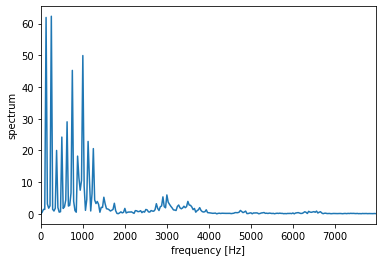

In [54]:
plt.plot(freqs[:N//2], X_abs[:N//2])
plt.xlabel("frequency [Hz]")
plt.ylabel("spectrum")
plt.xlim(0, max(freqs[:N//2]))

## 対数(振幅)スペクトル
振幅スペクトルの自然対数をとる

In [55]:
X_ln = np.log(X_abs)

対数スペクトルの可視化

(0.0, 7968.75)

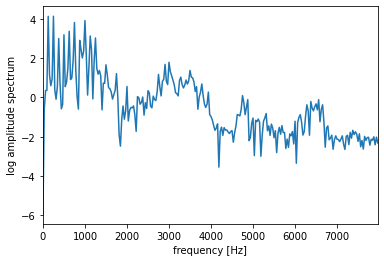

In [56]:
plt.plot(freqs[:N//2], X_ln[:N//2])
plt.xlabel("frequency [Hz]")
plt.ylabel("log amplitude spectrum")
plt.xlim(0,max(freqs[:N//2]))

## ケプストラムの導出
対数スペクトルを逆離散フーリエ変換

In [57]:
ceps = ifft(X_ln)

ケプストラムの可視化

Text(0, 0.5, 'cepstrum')

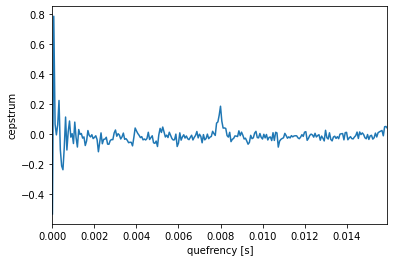

In [58]:
plt.plot(t_target[:N//2],ceps[:N//2].real)
plt.xlim(0, max(t_target[:N//2]))
plt.xlabel("quefrency [s]")
plt.ylabel("cepstrum")

## リフタリング
ケプストラムの低次成分を抽出

In [59]:
low_sample = 30 # 抽出する次数
# ceps_low = ceps
ceps_low = np.copy(ceps)  #　内容のみコピー(アドレスは分離)
ceps_low[low_sample:N-low_sample] = 0

リフタリング後のケプストラム

Text(0, 0.5, 'cepstrum')

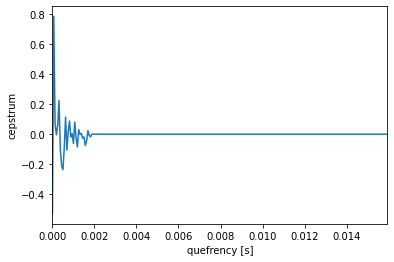

In [60]:
plt.plot(t_target[:N//2], ceps_low[:N//2].real)
plt.xlim(0, max(t_target[:N//2]))
plt.xlabel("quefrency [s]")
plt.ylabel("cepstrum")

## スペクトル包絡の導出
リフタリング後のケプストラムをフーリエ変換

In [61]:
spec_env = fft(ceps_low)

スペクトル包絡を可視化

(0.0, 7968.75)

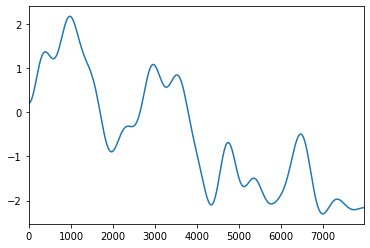

In [62]:
freqs = fftfreq(N, d=1.0/fs)
plt.plot(freqs[:N//2], spec_env[:N//2].real)
plt.xlim(0, max(freqs[:N//2]))

スペクトルと重ね合わせて表示

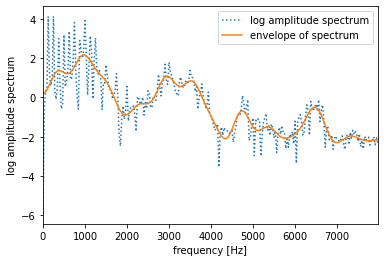

In [63]:
plt.plot(freqs[:N//2], X_ln[:N//2], linestyle=":", label="log amplitude spectrum")
plt.plot(freqs[:N//2], spec_env[:N//2].real, label="envelope of spectrum")
plt.xlabel("frequency [Hz]")
plt.ylabel("log amplitude spectrum")
plt.xlim(0, max(freqs[:N//2]))
plt.legend()

In [64]:
X_ln_re = fft( ceps )

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(0.0, 7968.75)

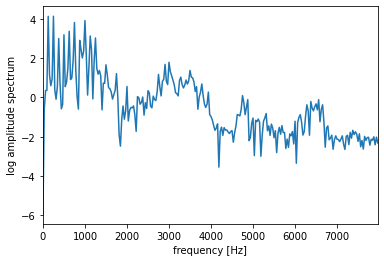

In [65]:
plt.plot(freqs[:N//2], X_ln_re[:N//2])
plt.xlabel("frequency [Hz]")
plt.ylabel("log amplitude spectrum")
plt.xlim(0,max(freqs[:N//2]))

In [66]:
X_abs_re = np.exp( X_ln_re )

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(0.0, 7968.75)

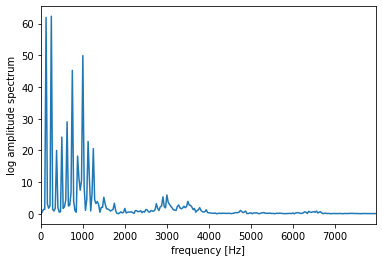

In [67]:
plt.plot(freqs[:N//2], X_abs_re[:N//2])
plt.xlabel("frequency [Hz]")
plt.ylabel("log amplitude spectrum")
plt.xlim(0,max(freqs[:N//2]))

In [68]:
X_re = X_abs_re * np.exp( 1j * X_angle )

Text(0.5, 0, 'frequency [Hz]')

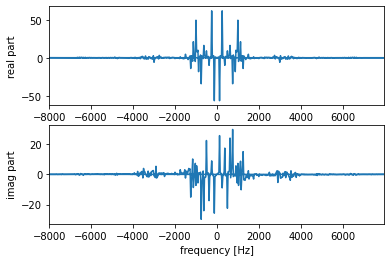

In [70]:
freqs = fftfreq(N, d=1.0/fs)

plt.subplot(2,1,1)
plt.plot(freqs, X_re.real)
plt.xlim(min(freqs), max(freqs))
plt.ylabel("real part")

plt.subplot(2,1,2)
plt.plot(freqs, X_re.imag)
plt.xlim(min(freqs), max(freqs))
plt.ylabel("imag part")

plt.xlabel("frequency [Hz]")


In [81]:
# 逆フーリエ変換
x = ifft( X )
x_re = ifft( X_re )

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


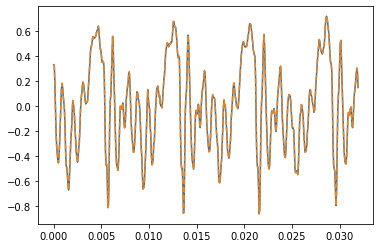

In [82]:
plt.plot( t_target , x )
plt.plot( t_target , x_re , linestyle="--" )
